<a href="https://colab.research.google.com/github/MansiT20/Github/blob/main/Telco_Customer_Churn_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

telco_data = pd.read_csv('Telco Customer Churn.csv')
print(telco_data)
print(telco_data.info)



      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



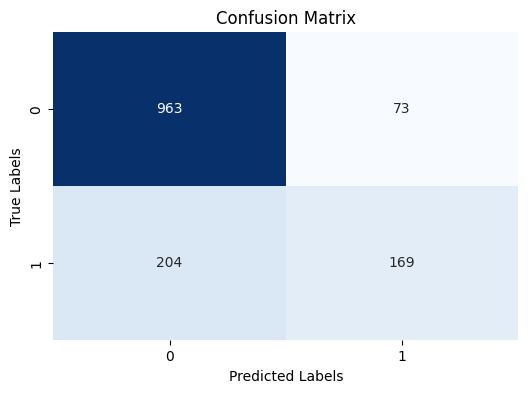

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have imported necessary libraries and loaded telco_data before this code snippet

# Convert categorical columns to numeric using one-hot encoding
telco_data = pd.get_dummies(telco_data, drop_first=True)

# Drop rows with missing values
telco_data.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = telco_data.drop(['Churn_Yes'], axis=1)  # Assuming 'Churn' is the target variable
y = telco_data['Churn_Yes']  # Assuming 'Churn' is encoded as 'Yes' and 'No'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

import pandas as pd
telco_data = pd.read_csv('Telco Customer Churn.csv')
print(telco_data.head())
from scipy.stats import f_oneway

# Perform ANOVA analysis on 'MonthlyCharges' across different 'Contract' types
contract_types = telco_data['Contract'].unique()
grouped_data = [telco_data[telco_data['Contract'] == contract_type]['MonthlyCharges'] for contract_type in contract_types]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

# Print ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret ANOVA results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in 'MonthlyCharges' across different contract types.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in 'MonthlyCharges' across different contract types.")

from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))